# Artificial Neural Network

## data preprocessing

### import packages

In [4]:
!pip install tensorflow

^CCollecting tensorflow
  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.0-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.66.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.5.0-py3-none-any.whl.me

In [5]:
import sys
print(sys.executable)

C:\Users\ACER\anaconda3\python.exe


In [7]:
import sys
!{sys.executable} -m pip install tensorflow

  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.0-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.66.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
  Using 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print(tf.__version__)

2.17.0


### importing dataset 

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [5]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
x = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values

In [7]:
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [8]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

### encoding categorical data 

we need to encode the gender 

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])

In [12]:
x

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

do the one hot encoding to transform 'geo' column

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [15]:
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

### splitting the dataset

In [17]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### feature scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
x_train

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [21]:
x_test

array([[-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  1.61255917]])

## Building the ANN

### initializing the ANN 

In [24]:
ann = tf.keras.models.Sequential()

### adding the input layer and the first hidden layer 

In [26]:
ann.add(tf.keras.layers.Dense(units=6,activation = 'relu'))

### adding next layer (second hidden layer)

In [28]:
ann.add(tf.keras.layers.Dense(units=6,activation = 'relu'))

### adding the output layer 

In [30]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [31]:
ann

<Sequential name=sequential, built=False>

## Training the ANN model

### compiling the ANN 

In [73]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### training the ANN model

In [79]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8484 - loss: 0.3556
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8549 - loss: 0.3366
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8577 - loss: 0.3400
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8585 - loss: 0.3523
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8562 - loss: 0.3420
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8674 - loss: 0.3386
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8582 - loss: 0.3435
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8637 - loss: 0.3379
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8574 - loss: 0.3445
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8618 - loss: 0.3440
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8508 - loss: 0.3504
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## making predictions 

In [91]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
[[False]]


### predict the test result

In [94]:
y_pred = ann.predict(x_test)
y_pred = (y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### making confusion matrix

In [97]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1506   89]
 [ 192  213]]


0.8595

### visualisation

Text(0.5, 1.0, 'The Confusion Matrix')

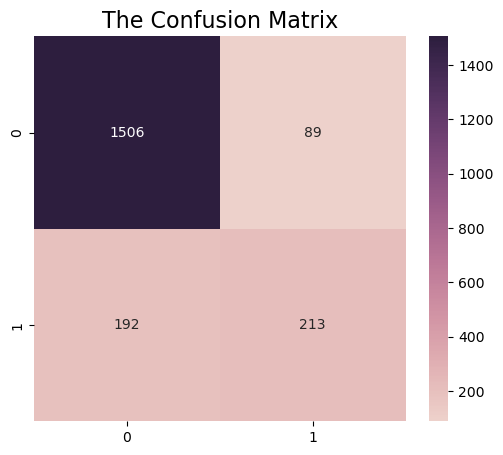

In [119]:
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cm,annot = True,fmt = '',cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('The Confusion Matrix', fontsize = 16)

----